In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
dados_produtos = pd.read_csv('Arquivos-desafio/olist_products_dataset.csv' , sep=',' , encoding='iso-8859-1') 

In [3]:
dados_pedidos = pd.read_csv('Arquivos-desafio/olist_order_items_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [4]:
dados_pedidos1 = pd.read_csv('Arquivos-desafio/olist_orders_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [5]:
dados_pagamentos = pd.read_csv('Arquivos-desafio/olist_order_payments_dataset.csv' , sep=',' , encoding='iso-8859-1')

In [6]:
# Combinei ambos os dataset com base no product_id para conseguiar acessar a data de ordem dos pedidos, categorias e preços.

In [7]:
df_combinado = pd.merge(dados_pedidos, dados_produtos, on='product_id', how='inner')


In [8]:
df_combinado = pd.merge(df_combinado, dados_pedidos1, on='order_id', how='inner')


In [9]:
df_combinado = pd.merge(df_combinado, dados_pagamentos, on='order_id', how='inner')

In [12]:
## Abaixo verifico se há algum valor duplicado, nulo ou iguais a 0,00


In [19]:
(df_combinado['price'] == 0).sum()

0

In [20]:
df_combinado.duplicated().sum()


0

In [29]:
df_combinado.isnull().sum()


order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [30]:
# Uma das consultas retorna uma grande quantidade de itens com a categoria nula
df_combinado[df_combinado['product_category_name'].isnull()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
3675,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0,ae55e228ded796581eccc67045516023,delivered,2017-09-26 15:24:03,2017-09-26 15:49:17,2017-09-28 18:42:42,2017-09-29 18:29:50,2017-10-11 00:00:00,1,credit_card,1,15.57
3676,0ca8999f0176e37f35b6e49a9b2569da,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-13 10:49:27,7.79,8.85,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0,750f02af7b06bb81d84d3e44b9afc6d3,delivered,2017-10-06 10:52:01,2017-10-07 10:49:27,2017-10-20 20:33:58,2017-10-24 13:36:19,2017-10-24 00:00:00,1,credit_card,2,98.80
3677,0ca8999f0176e37f35b6e49a9b2569da,5,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-13 10:49:27,7.79,8.85,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0,750f02af7b06bb81d84d3e44b9afc6d3,delivered,2017-10-06 10:52:01,2017-10-07 10:49:27,2017-10-20 20:33:58,2017-10-24 13:36:19,2017-10-24 00:00:00,1,credit_card,2,98.80
3680,0ca8999f0176e37f35b6e49a9b2569da,3,90a57d62c9b9f884fae33a10dff953b4,38e6dada03429a47197d5d584d793b41,2017-10-13 10:49:27,15.36,4.43,NaN,NaN,NaN,NaN,600.0,20.0,5.0,14.0,750f02af7b06bb81d84d3e44b9afc6d3,delivered,2017-10-06 10:52:01,2017-10-07 10:49:27,2017-10-20 20:33:58,2017-10-24 13:36:19,2017-10-24 00:00:00,1,credit_card,2,98.80
3683,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0,baa4ed05f22ffb6c4a41b71b699a492c,delivered,2017-02-13 16:18:07,2017-02-14 03:42:56,2017-02-14 08:32:53,2017-02-15 11:35:56,2017-03-10 00:00:00,1,boleto,1,18.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117414,fe421e7d38d622aedc8ca97d58771ea6,1,28209b7aed95f7c0c9b9806f974a104e,432c37c9dfba871172ec162e20118b8c,2017-04-27 08:55:13,119.90,18.27,NaN,NaN,NaN,NaN,500.0,30.0,4.0,15.0,9bf5b0d90ce42a8216c828b07d44b528,delivered,2017-04-22 08:49:09,2017-04-22 08:55:13,2017-04-24 12:38:51,2017-05-15 12:08:01,2017-05-19 00:00:00,1,credit_card,9,138.17
117430,fe7387b4827383e4868b82be1dd12722,1,41bf6a8c9424d4ec060e39e21883db3f,226b05fe067266c59c15dae208213d06,2018-04-08 22:55:29,29.90,17.06,NaN,NaN,NaN,NaN,150.0,22.0,14.0,14.0,36296254382f4dba3677937dcb5285f5,delivered,2018-04-02 22:13:18,2018-04-02 22:55:29,2018-04-03 22:12:33,2018-04-07 14:35:43,2018-04-25 00:00:00,1,credit_card,3,46.96
117445,fe97f3949cbc37b9ab48ac5769514cbe,1,40a1e3c65a0bcf6f4ebba840a8156ba2,f3295428338a40977a03f555246a70f4,2017-12-05 13:39:28,29.90,15.10,NaN,NaN,NaN,NaN,200.0,16.0,10.0,13.0,45e844a084390520feb827c2b1728440,delivered,2017-11-27 13:42:45,2017-11-29 13:39:28,2017-11-30 16:14:33,2017-12-18 13:13:34,2017-12-18 00:00:00,1,credit_card,4,45.00
117449,fea563d194760a0737be8bff36ca8c40,1,34a4076cd057a823247a5a44e84872d8,520b493b57809f446cb0a233bb3e25c7,2017-06-15 18:35:09,59.90,17.67,NaN,NaN,NaN,NaN,1900.0,40.0,40.0,30.0,495a5765ce04283cae03e31b63355cd4,delivered,2017-06-10 18:27:07,2017-06-11 18:35:09,2017-06-12 16:48:49,2017-06-19 18:14:40,2017-07-05 00:00:00,1,credit_card,7,77.57


In [31]:
# Verifico que a proporção de produtos sem categoria é aproximadamente 1,424%, o que pode ser considerado insignificante para o resultado final. 
df_combinado  

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1,boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,1,credit_card,4,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,1,credit_card,1,181.10
117597,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,2018-08-18 10:10:11,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00,1,credit_card,2,112.52
117598,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0,dec8952e97ef6124259c56914fb3569c,delivered,2017-06-01 16:53:03,2017-06-01 17:05:23,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26 00:00:00,1,credit_card,1,756.91
117599,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,2017-12-18 17:33:04,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24 00:00:00,1,credit_card,7,273.92


In [25]:
df_combinado.sort_values(by='price', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
39573,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,1,credit_card,8,6929.31
117510,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,1,boleto,1,6922.21
116604,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,1,boleto,1,6726.66
108240,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,1,credit_card,10,4950.34
63860,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,1,credit_card,8,4764.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102340,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,1,credit_card,2,196.11
102329,8272b63d03f5f79c56e9e4120aec44ef,19,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,1,credit_card,2,196.11
52890,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,5af78bf1a82a2660d1e3fd78c645f58f,delivered,2018-04-27 12:37:10,2018-04-28 02:55:22,2018-04-30 15:38:00,2018-05-05 16:22:05,2018-05-23 00:00:00,1,boleto,1,54.20
84931,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,9f9d249355f63c5c1216a82b802452c1,delivered,2018-04-24 20:15:21,2018-04-24 20:33:18,2018-04-25 13:36:00,2018-05-04 19:32:53,2018-05-18 00:00:00,1,credit_card,1,19.08


In [26]:
df_combinado.sort_values(by='freight_value', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
107987,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68,bebes,44.0,385.0,6.0,14675.0,55.0,64.0,52.0,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,2018-04-19 06:55:13,2018-04-19 18:32:29,2018-04-27 19:45:00,2018-05-17 00:00:00,1,credit_card,12,1388.68
38192,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28,utilidades_domesticas,52.0,1910.0,4.0,30000.0,75.0,58.0,65.0,f08306b95370e8d5f0d97b71229284b6,delivered,2018-07-30 10:04:21,2018-08-01 04:35:22,2018-08-02 15:04:00,2018-08-08 00:46:43,2018-08-14 00:00:00,1,boleto,1,2713.36
38193,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28,utilidades_domesticas,52.0,1910.0,4.0,30000.0,75.0,58.0,65.0,f2c743697f9b2ff2902df23a16582d80,delivered,2018-08-13 14:07:50,2018-08-15 03:15:09,2018-08-15 08:53:00,2018-08-24 00:14:39,2018-09-05 00:00:00,1,boleto,1,2713.36
106799,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59,utilidades_domesticas,59.0,649.0,1.0,25250.0,68.0,66.0,66.0,98ef9188ce9357bd77f60150a935c7fb,delivered,2018-07-29 11:41:33,2018-07-31 04:31:32,2018-07-31 13:40:00,2018-08-06 20:07:34,2018-08-22 00:00:00,1,boleto,1,1488.59
62100,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30,beleza_saude,60.0,554.0,1.0,30000.0,55.0,75.0,61.0,9913942a9bd26b840c4d19db0cbf6b89,delivered,2018-04-06 17:20:33,2018-04-07 17:15:10,2018-04-25 13:57:00,2018-05-08 13:12:16,2018-05-21 00:00:00,1,credit_card,8,1388.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,185a17e610fa1a503abd98770d3eda4d,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-25 13:10:39,69.90,0.00,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,3d1e417219b6176d6695c6cf838d599f,delivered,2018-04-19 12:46:41,2018-04-19 13:10:39,2018-04-20 20:21:57,2018-04-25 18:38:49,2018-05-14 00:00:00,1,credit_card,1,69.90
7179,11bd5b514c1e1b6a737ed2fd95489424,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-24 13:52:04,69.90,0.00,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,0ec3d7fc969d0aa06a92af6c0689a73f,delivered,2018-04-18 13:30:46,2018-04-18 13:52:04,2018-04-19 17:46:32,2018-04-24 15:43:55,2018-05-14 00:00:00,1,credit_card,2,139.80
7178,11bd5b514c1e1b6a737ed2fd95489424,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-24 13:52:04,69.90,0.00,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,0ec3d7fc969d0aa06a92af6c0689a73f,delivered,2018-04-18 13:30:46,2018-04-18 13:52:04,2018-04-19 17:46:32,2018-04-24 15:43:55,2018-05-14 00:00:00,1,credit_card,2,139.80
3218,3e6a8242ed19ca13a5da5659bc36030f,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-03 18:30:24,99.90,0.00,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,07c6e5fcb00572b328e792042930c1b0,delivered,2018-04-26 18:20:03,2018-04-26 18:32:05,2018-04-30 06:16:00,2018-05-08 15:22:51,2018-05-29 00:00:00,1,credit_card,3,99.90


In [32]:
df_combinado.sort_values(by='order_purchase_timestamp', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
91477,54282e97f61c23b78330c15b154c867d,1,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,2018-09-05 17:30:54,145.00,21.46,moveis_cozinha_area_de_servico_jantar_e_jardim,58.0,576.0,1.0,10400.0,16.0,68.0,32.0,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaN,2018-09-06 00:00:00,1,voucher,1,166.46
13727,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-08-31 15:10:26,84.99,8.76,informatica_acessorios,33.0,1127.0,2.0,450.0,16.0,4.0,20.0,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1,credit_card,1,93.75
27573,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,artigos_de_festas,54.0,429.0,1.0,450.0,28.0,9.0,19.0,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00,1,credit_card,1,33.23
2172,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,beleza_saude,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00,1,voucher,1,61.29
45933,0b223d92c27432930dfe407c6aea3041,2,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,moveis_cozinha_area_de_servico_jantar_e_jardim,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00,1,credit_card,8,510.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83591,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,relogios_presentes,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,1,boleto,1,45.46
98881,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,25e6ffe976bd75618accfe16cefcbd0d,2016-10-21 16:19:54,100.00,9.34,bebes,32.0,561.0,1.0,500.0,18.0,18.0,18.0,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00,1,credit_card,1,109.34
115249,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,telefonia,42.0,381.0,1.0,700.0,25.0,2.0,25.0,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,1,credit_card,3,75.06
19064,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,moveis_decoracao,41.0,754.0,3.0,1800.0,32.0,6.0,28.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1,credit_card,1,136.23


In [ ]:
df_combinado.sort_values(by='payment_value', ascending=False)

In [34]:
''' Após muitas tentativas usando price e freight_value, e ter desconsiderado o dataset de payments, após debates com a minha
squad pude analisar melhor e finalmente consegui enxergar como o payment_value pode afetar drasticamente a análise, considerando
o uso de vouchers, impostos adicionais, parcelamentos com juros e outros, que são variáveis altamente relevantes no resultado
final da receita total.'''

# Pude obter uma visão mais abrangente de que forma a coluna payment_value podia afetar os valores.
analysis_df = df_combinado.groupby('order_id').agg(
    total_price=('price', 'sum'),
    total_freight=('freight_value', 'sum'),
    total_payment=('payment_value', 'first')  
)

# calculando a diferença
analysis_df['calculated_total'] = analysis_df['total_price'] + analysis_df['total_freight']
analysis_df['difference'] = (analysis_df['total_payment'] - analysis_df['calculated_total']).round(2)

# Há muitos casos com diferenças significativas de valores, o que pode sugerir que tenha havido impostos adicionais, custos 
# de importação, juros a dependender do método de pagamento escolhido entre outros.
print(analysis_df[analysis_df['difference'] == 0])


                                  total_price  total_freight  total_payment  \
order_id                                                                      
00010242fe8c5a6d1ba2dd792cb16214        58.90          13.29          72.19   
00018f77f2f0320c557190d7a144bdd3       239.90          19.93         259.83   
000229ec398224ef6ca0657da4fc703e       199.00          17.87         216.87   
00024acbcdf0a6daa1e931b038114c75        12.99          12.79          25.78   
00042b26cf59d7ce69dfabb4e55b4fd9       199.90          18.14         218.04   
...                                       ...            ...            ...   
fffc94f6ce00a00581880bf54a75a037       299.99          43.41         343.40   
fffcd46ef2263f404302a634eb57f7eb       350.00          36.53         386.53   
fffce4705a9662cd70adb13d4a31832d        99.90          16.95         116.85   
fffe18544ffabc95dfada21779c9644f        55.99           8.72          64.71   
fffe41c64501cc87c801fd61db3f6244        43.00       

In [35]:
# Da mesma forma, há muitos valores de diferença negativos, que indicam vouchers, descontos, promoções e outros.
print(analysis_df[analysis_df['difference'] < 0])

                                  total_price  total_freight  total_payment  \
order_id                                                                      
0016dfedd97fc2950e388d2971d718c7        99.50          41.60          17.92   
002f19a65a2ddd70a090297872e6d64e       107.96          46.62          44.11   
0071ee2429bc1efdc43aa3e073a5290e       359.96          24.92         100.00   
009ac365164f8e06f59d18a08045f6c4       101.40          90.60           8.75   
00b4a910f64f24dbcac04fe54088a443        67.98          33.20          48.05   
...                                       ...            ...            ...   
ff978de32e717acd3b5abe1fb069d2b6       111.96          84.60           7.68   
ffa1dd97810de91a03abd7bd76d2fed1       869.98          40.64         418.73   
ffa39020fe7c8a3e907320e1bec4b985       113.98          28.30          64.01   
ffb18bf111fa70edf316eb0390427986       569.00          48.25         617.24   
ffc730a0615d28ec19f9cad02cb41442        39.98       

In [37]:
df_combinado['order_id'].value_counts()

order_id
895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
a3725dfe487d359b5be08cac48b64ec5    24
                                    ..
cd7d5eba4ca59e359249279469aa4f7a     1
c6375a52330f2050e91fdca954b2e817     1
c42c77adb71ee6c1ca91e61888a18932     1
c3c0e95fc6035316212f1b4e2c7bce3d     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98665, dtype: int64

In [38]:
# visualizando valores na coluna 'order_status'
df_combinado['order_status'].unique()


array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'unavailable', 'approved'], dtype=object)

In [39]:
# Filtrar apenas os pedidos entregues
df_combinado = df_combinado[df_combinado['order_status'] == 'delivered']


In [41]:
# Verificando aproximadamente qual a última data de compra no conjunto de dados
df_combinado.sort_values(by='order_purchase_timestamp', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
13727,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-08-31 15:10:26,84.99,8.76,informatica_acessorios,33.0,1127.0,2.0,450.0,16.0,4.0,20.0,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1,credit_card,1,93.75
27573,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,artigos_de_festas,54.0,429.0,1.0,450.0,28.0,9.0,19.0,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00,1,credit_card,1,33.23
2172,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,beleza_saude,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00,1,voucher,1,61.29
45932,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,moveis_cozinha_area_de_servico_jantar_e_jardim,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00,1,credit_card,8,510.96
45933,0b223d92c27432930dfe407c6aea3041,2,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,moveis_cozinha_area_de_servico_jantar_e_jardim,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00,1,credit_card,8,510.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112671,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96,fashion_calcados,56.0,459.0,2.0,9000.0,16.0,5.0,33.0,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23 00:00:00,1,credit_card,4,40.95
113246,d207cc272675637bfed0062edffd0818,1,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,moveis_decoracao,55.0,130.0,1.0,2050.0,40.0,11.0,34.0,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23 00:00:00,1,credit_card,6,133.46
100091,a41c8759fbe7aab36ea07e038b2d4465,1,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,esporte_lazer,39.0,141.0,1.0,767.0,26.0,8.0,20.0,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29 00:00:00,1,boleto,1,53.73
111004,be5bc2f0da14d8071e2d45451ad119d9,1,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,esporte_lazer,39.0,518.0,1.0,400.0,16.0,16.0,16.0,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07 00:00:00,1,boleto,1,39.09


In [43]:
# Garantindo que o order_purchase_timestamp se comportara como datetime para prosseguir com minha consulta e filtrar pelos últimos 12 meses
df_combinado.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(df_combinado['order_purchase_timestamp'])

In [52]:
data_referencia = pd.Timestamp('2018-08-29 ')

In [53]:
# Filtrando os dados dos últimos 12 meses a partir da data do último pedido do conjunto de dados
ultimos_12_meses = df_combinado[(df_combinado['order_purchase_timestamp'] >= data_referencia - pd.DateOffset(months=12)) &
                           (df_combinado['order_purchase_timestamp'] < data_referencia)]

In [54]:
receita_por_categoria = ultimos_12_meses.groupby('product_category_name')['payment_value'].sum().reset_index()

In [55]:
receita_por_categoria['payment_value'] = receita_por_categoria['payment_value'].round(2) 

In [56]:
# Verificando a receita total por categoria
print(receita_por_categoria)

        product_category_name  payment_value
0   agro_industria_e_comercio      110636.01
1                   alimentos       38026.92
2           alimentos_bebidas       24177.10
3                       artes       19826.22
4          artes_e_artesanato        2107.54
..                        ...            ...
68    sinalizacao_e_seguranca       64955.79
69   tablets_impressao_imagem        3413.56
70                  telefonia      387030.46
71             telefonia_fixa      175455.25
72      utilidades_domesticas      858393.38

[73 rows x 2 columns]


In [58]:
# Verificando as maiores e menores receitas
receita_por_categoria.sort_values(by='payment_value', ascending=False)

,product_category_name,payment_value
13,cama_mesa_banho,1310557.92
11,beleza_saude,1307304.26
44,informatica_acessorios,1195642.86
66,relogios_presentes,1162120.92
54,moveis_decoracao,1068369.90
...,...,...
60,pc_gamer,1340.95
15,casa_conforto_2,1021.25
17,cds_dvds_musicais,478.45
37,fashion_roupa_infanto_juvenil,475.50


In [60]:
maior_receita = receita_por_categoria.sort_values(by='payment_value', ascending=False)

In [61]:
maior_receita

,product_category_name,payment_value
13,cama_mesa_banho,1310557.92
11,beleza_saude,1307304.26
44,informatica_acessorios,1195642.86
66,relogios_presentes,1162120.92
54,moveis_decoracao,1068369.90
...,...,...
60,pc_gamer,1340.95
15,casa_conforto_2,1021.25
17,cds_dvds_musicais,478.45
37,fashion_roupa_infanto_juvenil,475.50


In [62]:
menor_receita = receita_por_categoria_sf.sort_values(by='payment_value', ascending=True)

In [64]:
menor_receita

,product_category_name,payment_value
67,seguros_e_servicos,115.45
37,fashion_roupa_infanto_juvenil,475.50
17,cds_dvds_musicais,478.45
15,casa_conforto_2,1021.25
60,pc_gamer,1340.95
...,...,...
54,moveis_decoracao,1068369.90
66,relogios_presentes,1162120.92
44,informatica_acessorios,1195642.86
11,beleza_saude,1307304.26


In [65]:
# Fazendo uma cópia e então filtrando os resultados para apresentar em um período de 12 meses
ultimos_12_meses = ultimos_12_meses.copy()

# Decidi que também gostaria de mostrar quais foram as melhores e piores categorias em cada mês ao longo dos últimos 12 meses.
ultimos_12_meses.loc[:, 'mes'] = ultimos_12_meses['order_purchase_timestamp'].dt.to_period('M')


In [66]:
ultimos_12_meses.sort_values(by='order_purchase_timestamp', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,mes
89625,4c867c2aac81653679eff07e922441a0,1,99c803fd17abc7a255efe370d53744e3,6b90f847357d8981edd79a1eb1bf0acb,2018-08-30 23:05:10,29.99,8.37,consoles_games,58.0,71.0,1.0,900.0,17.0,16.0,13.0,8ffe52ac7d480a27180338e697eec534,delivered,2018-08-28 22:51:54,2018-08-28 23:05:10,2018-08-29 12:46:00,2018-08-31 02:03:50,2018-08-31 00:00:00,1,credit_card,1,38.36,2018-08
115403,e7c290bfc31d7eed478c3d3d2d4d2953,1,44406b87e5ac6494cdb0c9dccd3b88d3,7dc8c42cc750eeafea6c85712ffee9bf,2018-09-11 22:43:50,39.99,9.03,construcao_ferramentas_jardim,57.0,217.0,4.0,400.0,25.0,25.0,25.0,004440537b68545ca3c341d7279bc4c0,delivered,2018-08-28 22:30:32,2018-08-28 22:43:50,2018-08-29 15:00:00,2018-08-30 17:18:48,2018-09-12 00:00:00,1,credit_card,1,98.04,2018-08
115404,e7c290bfc31d7eed478c3d3d2d4d2953,2,44406b87e5ac6494cdb0c9dccd3b88d3,7dc8c42cc750eeafea6c85712ffee9bf,2018-09-11 22:43:50,39.99,9.03,construcao_ferramentas_jardim,57.0,217.0,4.0,400.0,25.0,25.0,25.0,004440537b68545ca3c341d7279bc4c0,delivered,2018-08-28 22:30:32,2018-08-28 22:43:50,2018-08-29 15:00:00,2018-08-30 17:18:48,2018-09-12 00:00:00,1,credit_card,1,98.04,2018-08
76199,dbb786f88b6d4e52fe3cb5d771b979d6,1,39a1a3b9314738724fce4b2907ae6686,da8622b14eb17ae2831f4ac5b9dab84a,2018-09-04 22:10:12,149.90,12.07,cama_mesa_banho,60.0,198.0,1.0,1550.0,34.0,7.0,32.0,478778636c75019554439f75286a22e3,delivered,2018-08-28 21:56:30,2018-08-28 22:10:12,2018-08-29 19:02:00,2018-08-30 18:22:45,2018-09-05 00:00:00,1,credit_card,8,161.97,2018-08
78753,3064071cf67a2cc381cd53b13055eac5,1,15de022edf1005363381e66bed514528,537eb890efff034a88679788b647c564,2018-08-31 08:30:21,19.90,7.56,moveis_decoracao,52.0,361.0,2.0,100.0,16.0,3.0,23.0,931bfab7036f6763dc1bdf6e2696e08b,delivered,2018-08-28 21:56:12,2018-08-29 08:30:21,2018-08-29 13:53:00,2018-08-30 19:04:08,2018-09-03 00:00:00,1,credit_card,2,27.46,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52830,63773910895f35751c9a1eb0ba5530c9,1,f51dde119b9a90e3c7464f0cc45c0953,128639473a139ac0f3e5f5ade55873a5,2017-09-05 02:04:15,18.90,12.48,eletronicos,47.0,57.0,2.0,150.0,18.0,7.0,11.0,fc7d02fe1a8f694424b9028c6b098b42,delivered,2017-08-29 02:04:08,2017-08-30 02:04:15,2017-09-01 18:27:38,2017-09-12 19:27:55,2017-09-19 00:00:00,1,credit_card,2,31.38,2017-08
72873,25df55b3cb298807a64158bf3b4d26d1,1,b79361867edbe85462b548334d136a8a,e24fc9fcd865784fb25705606fe3dfe7,2017-09-05 09:50:16,150.00,8.79,beleza_saude,49.0,1773.0,2.0,125.0,13.0,7.0,9.0,0e747b71e41262f6648648e1f7799d80,delivered,2017-08-29 00:45:28,2017-08-30 09:50:16,2017-08-30 16:00:07,2017-09-01 19:12:31,2017-09-11 00:00:00,1,credit_card,8,158.79,2017-08
63196,18edb9e5b61f525f0da899c852534893,1,0b7fb806fe0194cc7eb473329c680e34,a37c340b91cb0169e8b029db6440fba2,2017-09-08 02:16:14,69.00,11.73,NaN,NaN,NaN,NaN,1000.0,28.0,11.0,28.0,0d475ec1ce439eb41eef87f144b30d3f,delivered,2017-08-29 00:12:32,2017-08-30 02:16:14,2017-09-05 20:02:54,2017-09-06 18:13:22,2017-09-13 00:00:00,1,boleto,1,80.73,2017-08
23946,abb44283b833f61c7c76d92b607ab4cf,1,02ce467092b184e71d3967d29110adc1,7c67e1448b00f6e969d365cea6b010ab,2017-09-12 02:10:58,169.99,53.79,moveis_escritorio,40.0,1187.0,1.0,12275.0,40.0,54.0,38.0,b4ee9ca3874d95a64070f4ae06350f1f,delivered,2017-08-29 00:03:09,2017-08-30 02:10:58,2017-09-06 23:59:32,2017-09-19 19:20:10,2017-09-26 00:00:00,1,boleto,1,223.78,2017-08


In [72]:
# Agrupei os dados considerando os meses
receita_por_categoria = ultimos_12_meses.groupby(['product_category_name', 'mes'])['payment_value'].sum().reset_index()

In [98]:
menor_receita_por_mes = receita_por_categoria.sort_values(by=['mes', 'payment_value'], ascending=[True, True])

In [104]:
menor_receita_por_mes = menor_receita_por_mes.groupby('mes').head(1).reset_index(drop=True)

In [74]:
receita_por_categoria.sort_values(by=['mes', 'payment_value'], ascending=[True, False], inplace=True)

In [105]:
maior_receita_por_mes = receita_por_categoria.groupby('mes').head(1).reset_index(drop=True)

In [106]:
maior_receita_por_mes

,product_category_name,mes,payment_value
0,pcs,2017-08,28635.79
1,telefonia_fixa,2017-09,109638.75
2,cama_mesa_banho,2017-10,87338.44
3,moveis_decoracao,2017-11,153085.00
4,esporte_lazer,2017-12,83243.43
5,informatica_acessorios,2018-01,145048.51
6,informatica_acessorios,2018-02,205756.18
7,informatica_acessorios,2018-03,141861.53
8,cama_mesa_banho,2018-04,123393.56
9,relogios_presentes,2018-05,145869.23


In [86]:
#Filtrei do menor para o maior para o df de menor receita
menor_receita = receita_por_categoria.sort_values(by='payment_value', ascending=True)

In [107]:
menor_receita_por_mes

,product_category_name,mes,payment_value
0,moveis_cozinha_area_de_servico_jantar_e_jardim,2017-08,26.28
1,casa_conforto_2,2017-09,29.69
2,fashion_roupa_infanto_juvenil,2017-10,54.09
3,fashion_esporte,2017-11,67.68
4,cds_dvds_musicais,2017-12,74.94
5,musica,2018-01,40.07
6,dvds_blu_ray,2018-02,42.53
7,casa_conforto_2,2018-03,44.33
8,artes_e_artesanato,2018-04,34.22
9,flores,2018-05,35.72


In [115]:
# Filtrando apenas os primeiros 10 resultados para melhor apresentação do gráfico
maior_receita = maior_receita.head(10).reset_index(drop=True)

In [117]:
menor_receita = menor_receita.head(10).reset_index(drop=True)

In [118]:
menor_receita

,product_category_name,mes,payment_value
0,Dvds Blu-Ray,2018-08,16.29
1,moveis_cozinha_area_de_servico_jantar_e_jardim,2017-08,26.28
2,Casa e conforto 2,2017-09,29.69
3,artes_e_artesanato,2018-04,34.22
4,Flores,2018-05,35.72
5,Música,2018-01,40.07
6,Dvds Blu-Ray,2018-02,42.53
7,Casa e conforto 2,2018-03,44.33
8,fashion_roupa_feminina,2018-02,45.09
9,Fashion roupas infanto juvenil,2017-10,54.09


In [108]:
maior_receita_por_mes['payment_value'].max()

205756.18

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


## Resumo e considerações finais

In [110]:
''' Ao longo da minha análise tive algumas dúvidas sobre conscistencia das informações como por exemplo, se eu deveria 
considerar ou não o frete no valor total da receita, ou se eu deveria trazer o resultado total dos 12 meses de receita
ou as maiores e menores receitas por categoria de cada mês ao longo dos 12 meses, por isso, trouxe as duas abordagens. '''

' Ao longo da minha análise tive algumas dúvidas sobre conscistencia das informações como por exemplo, se eu deveria \nconsiderar ou não o frete no valor total da receita, ou se eu deveria trazer o resultado total dos 12 meses de receita\nou as maiores e menores receitas por categoria de cada mês ao longo dos 12 meses, por isso, trouxe as duas abordagens. '

In [137]:
'''Acabei tendo muitas categorias e muito dataframes diferentes, então encontrei uma forma de fazer o replace das
colunas de categorias para melhor visualização nos gráficos.
'''
replace_categorias = [maior_receita_por_mes, menor_receita, maior_receita, menor_receita_por_mes]

replace_itens = {
    'cama_mesa_banho': 'Cama, mesa e banho',
    'relogios_presentes': 'Relógios e presentes',
    'esporte_lazer': 'Esportes e lazer',
    'informatica_acessorios': 'Informática e acessórios',
    'beleza_saude': 'Saúde e beleza',
    'casa_conforto_2': 'Casa e conforto 2',
    'fashion_esporte': 'Fashion e esporte',
    'musica': 'Música',
    'fashion_roupa_infanto_juvenil': 'Fashion roupas infanto juvenil',
    'cds_dvds_musicais': 'Cds e Dvds musicais',
    'dvds_blu_ray': 'Dvds Blu-Ray',
    'flores': 'Flores',
    'pcs': 'Computadores',
    'telefonia_fixa': 'Telefonia Fixa',
    'moveis_decoracao': 'Móveis e decoração',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Móveis',
    'artes_e_artesanato': 'Artes e Artesanatos',
    'tablets_impressao_imagem': 'Tablets e Impressão',
    'moveis_escritorio': 'Móveis de Escritório',
    'ferramentas_jardim': 'Ferramentas e Jardim',
    'utilidades_domesticas': 'Útilidades domésticas',
    'fashion_roupa_feminina': 'Roupas Femininas',
}

for df in replace_categorias:
    if 'product_category_name' in df.columns:
        df['product_category_name'] = df['product_category_name'].replace(replace_itens)

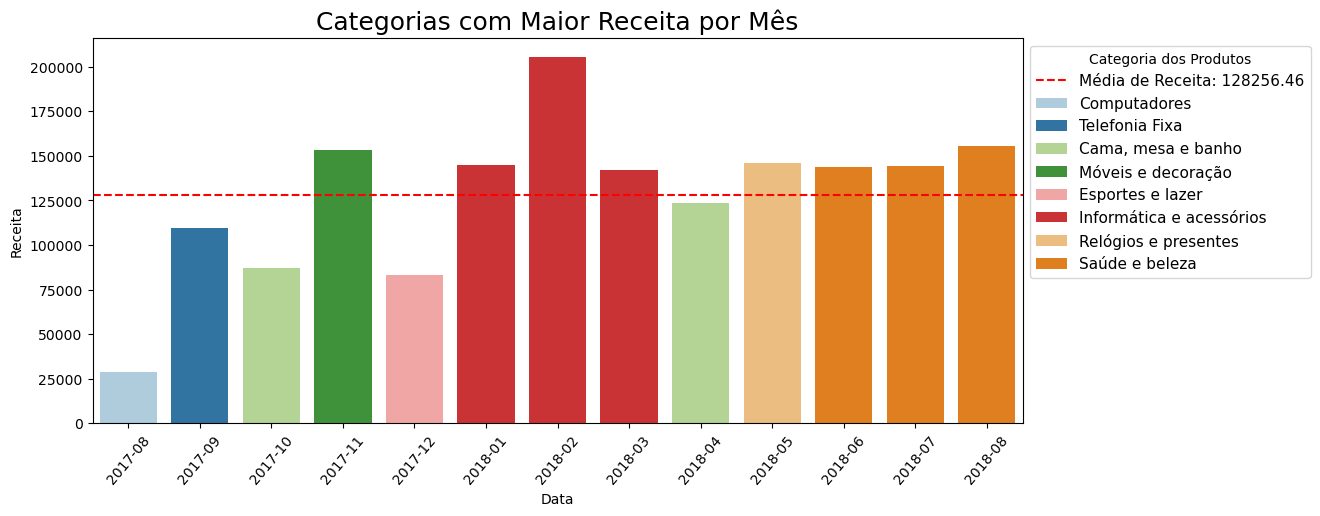

'Observa-se que a categoria de Informática e Acessórios consistentemente apresenta altas receitas, o que não parece\nestar diretamente relacionado a uma data comemorativa específica. Isso pode indicar uma tendência constante de preferência\ndos consumidores por esta categoria, possivelmente influenciada pelo início do ano letivo. \n\n   A partir de junho, a categoria de Saúde e Beleza registrou altos rendimentos que se mantiveram até o final do período \nanalisado, com valores acima da média de receita dos últimos 12 meses. Esse aumento pode estar relacionado ao interesse\ndos consumidores por esses produtos em períodos próximos a datas comemorativas como o Dia dos Namorados e o Dia dos Pais. '

In [138]:
plt.figure(figsize=(12, 5))
sns.barplot(x='mes', y='payment_value', hue='product_category_name', data=maior_receita_por_mes, palette='Paired', dodge=False) 
plt.xlabel('Data')
plt.ylabel('Receita')

media_receita = maior_receita_por_mes['payment_value'].mean()
plt.axhline(y=media_receita, color='r', linestyle='--', label=f'Média de Receita: {media_receita:.2f}')

plt.title('Categorias com Maior Receita por Mês', fontsize=18)
plt.xticks(rotation=50)
plt.legend(title='Categoria dos Produtos', fontsize=11, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

'''Observa-se que a categoria de Informática e Acessórios consistentemente apresenta altas receitas de Janeiro até março, 
o que não parece estar diretamente relacionado a uma data comemorativa específica. Isso pode indicar uma tendência entre 
o público alvo por esta categoria, possivelmente influenciada pelo início do ano letivo. 
   
   Em maio houve um pico de vendas na categoria Relógios e Presentes, possívelmente influenciada pela comemoração
do dia das mães.

   A partir de junho, a categoria de Saúde e Beleza registrou altos rendimentos que se mantiveram até o final do período 
analisado, com valores acima da média de receita dos últimos 12 meses. Esse aumento pode estar relacionado ao interesse
dos consumidores por esses produtos em períodos próximos a datas comemorativas como o Dia dos Namorados e o Dia dos Pais. '''

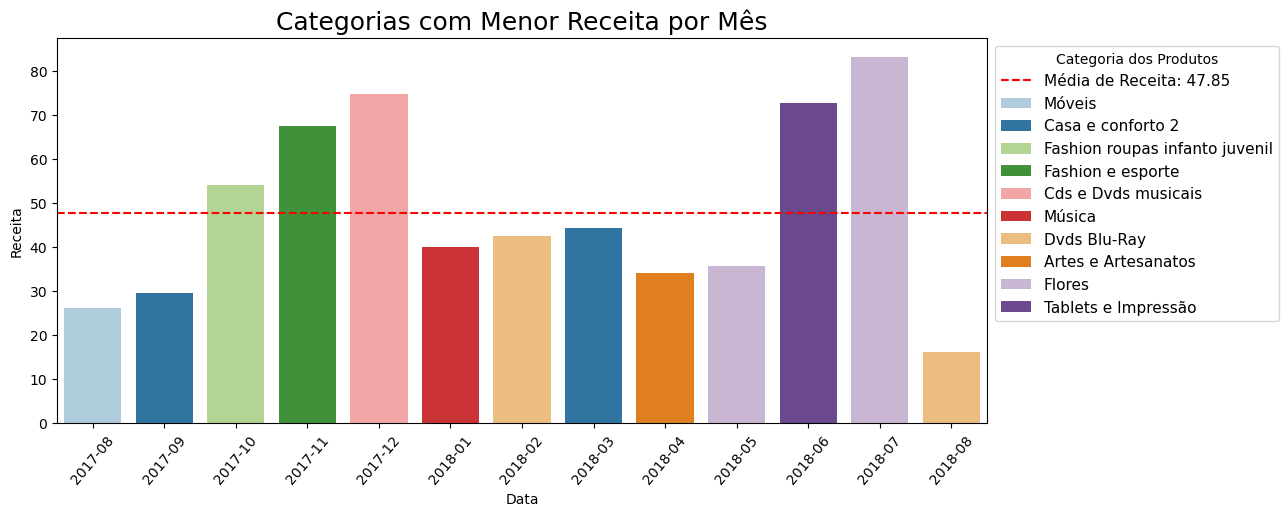

'As categorias com menor receita podem ter suas causas atribuídas a novas tendências e mudanças tecnológicas que \nalteram a maneira como as pessoas consomem entretenimento, além do investimento variável da loja nessas categorias.'

In [139]:
plt.figure(figsize=(12, 5))
sns.barplot(x='mes', y='payment_value', hue='product_category_name', data=menor_receita_por_mes, palette='Paired', dodge=False)  
plt.xlabel('Data')
plt.ylabel('Receita')

media_receita = menor_receita_por_mes['payment_value'].mean()
plt.axhline(y=media_receita, color='r', linestyle='--', label=f'Média de Receita: {media_receita:.2f}')

plt.title('Categorias com Menor Receita por Mês', fontsize=18)
plt.xticks(rotation=50)
plt.legend(title='Categoria dos Produtos', fontsize=11, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

'''As categorias com menor receita podem ter suas causas atribuídas a novas tendências e mudanças tecnológicas que 
alteram a maneira como as pessoas consomem entretenimento, além do investimento variável da loja nessas categorias.'''

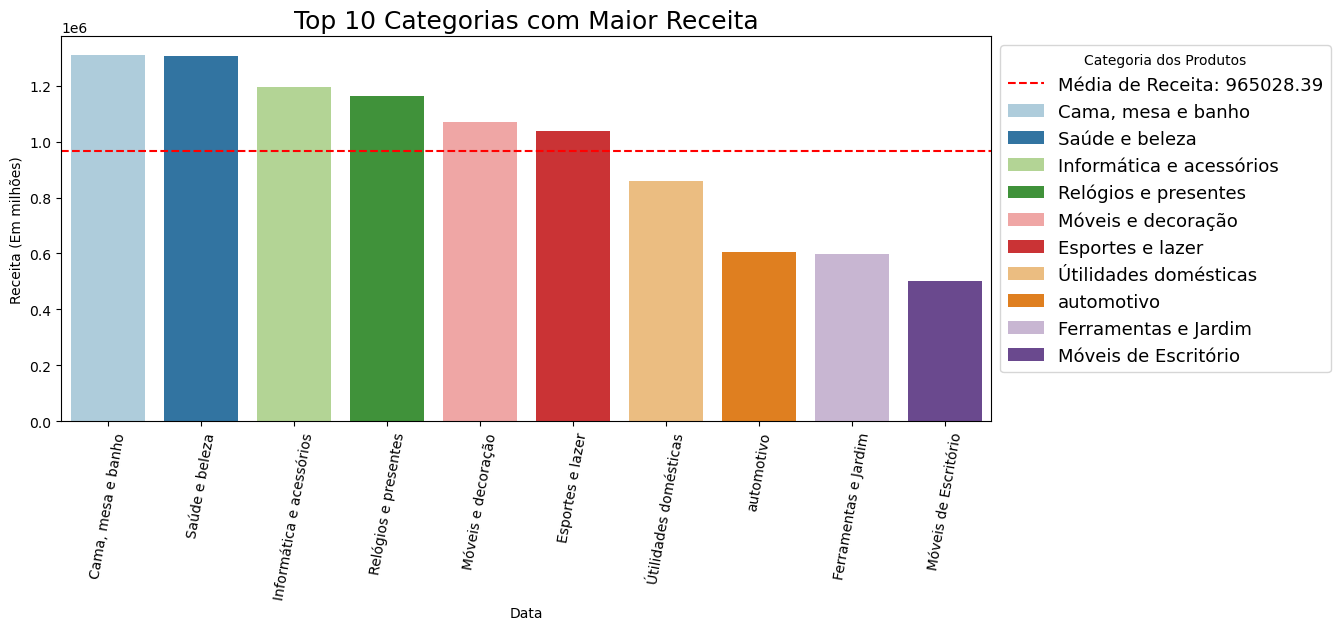

' O Gráfico demonstra uma grande demanda dos consumidores pelas categorias Cama, mesa e banho e Saúde e beleza durante o \nperíodo total de 12 meses da análise, o que pode ser influênciado por uma grande variedade de itens nessas categorias, \nalém de uma tendência específica dos consumidores e a necessidade de renovação mais frequente do que em outras categorias.'

In [140]:
plt.figure(figsize=(12, 5))
sns.barplot(x='product_category_name', y='payment_value', hue='product_category_name', data=maior_receita, palette='Paired', dodge=False)  
plt.xlabel('Data')
plt.ylabel('Receita (Em milhões)')

media_receita = maior_receita['payment_value'].mean()
plt.axhline(y=media_receita, color='r', linestyle='--', label=f'Média de Receita: {media_receita:.2f}')

plt.title('Top 10 Categorias com Maior Receita', fontsize=18)
plt.xticks(rotation=80)
plt.legend(title='Categoria dos Produtos', fontsize=13, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

''' O Gráfico demonstra uma grande demanda dos consumidores pelas categorias Cama, mesa e banho e Saúde e beleza durante o 
período total de 12 meses da análise, o que pode ser influênciado por uma grande variedade de itens nessas categorias, 
além de uma tendência específica dos consumidores e a necessidade de renovação mais frequente do que em outras categorias.'''

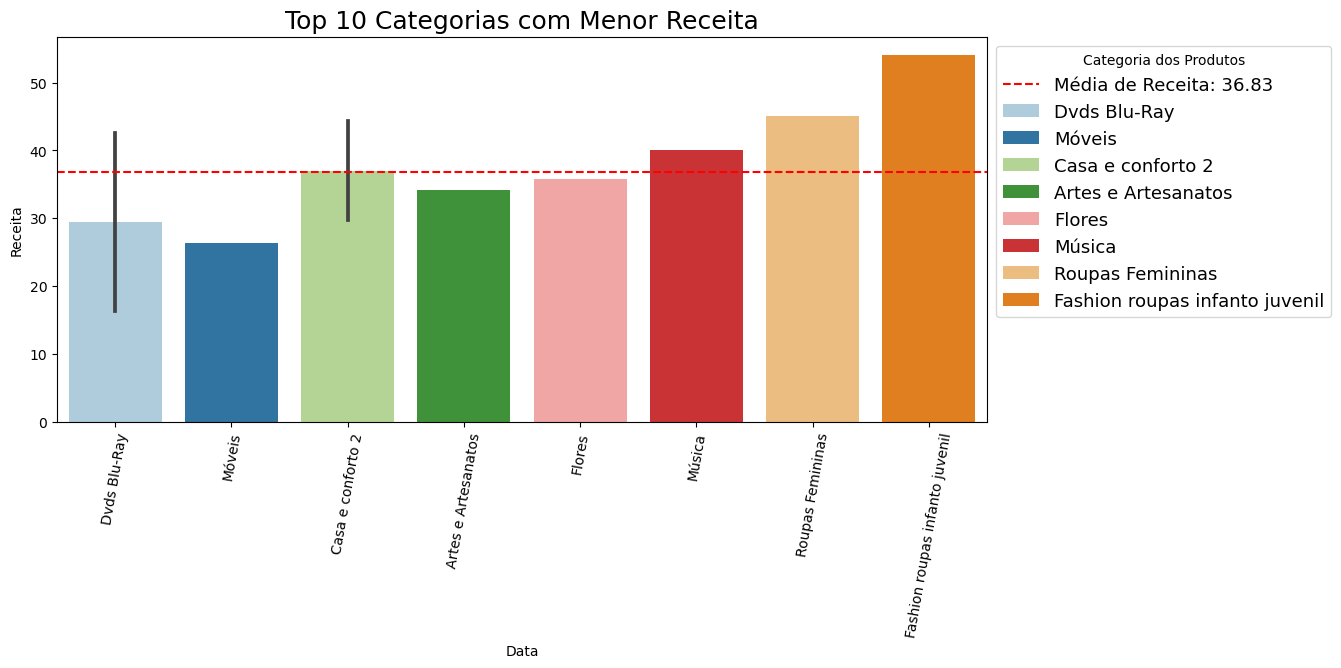

' As categorias com menor receita podem ter suas causas atribuídas a novas tendências e mudanças tecnológicas que \nalteram a maneira como as pessoas consomem entretenimento, além do investimento em variedade e divulgação da loja nessas\ncategorias.'

In [141]:
plt.figure(figsize=(12, 5))
sns.barplot(x='product_category_name', y='payment_value', hue='product_category_name', data=menor_receita, palette='Paired', dodge=False)  
plt.xlabel('Data')
plt.ylabel('Receita')

media_receita = menor_receita['payment_value'].mean()
plt.axhline(y=media_receita, color='r', linestyle='--', label=f'Média de Receita: {media_receita:.2f}')

plt.title('Top 10 Categorias com Menor Receita', fontsize=18)
plt.xticks(rotation=80)
plt.legend(title='Categoria dos Produtos', fontsize=13, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

''' As categorias com menor receita podem ter suas causas atribuídas a novas tendências e mudanças tecnológicas que 
alteram a maneira como as pessoas consomem entretenimento, além do investimento em variedade e divulgação da loja nessas
categorias.'''